Importing the data to the programm 

In [156]:
from matplotlib.colors import ListedColormap
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import svm, ensemble, metrics, tree, neural_network, naive_bayes, neighbors
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('/content/sample_data/ecoli.data', names=['Sequence_Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class_Distr'])

df[['Sequence_Name', 'mcg']] = df['Sequence_Name'].str.split(n=1, expand=True)
df[['mcg', 'gvh']] = df['mcg'].str.split(n=1, expand=True)
df[['gvh', 'lip']] = df['gvh'].str.split(n=1, expand=True)
df[['lip', 'chg']] = df['lip'].str.split(n=1, expand=True)
df[['chg', 'aac']] = df['chg'].str.split(n=1, expand=True)
df[['aac', 'alm1']] = df['aac'].str.split(n=1, expand=True)
df[['alm1', 'alm2']] = df['alm1'].str.split(n=1, expand=True)
df[['alm2', 'Class_Distr']] = df['alm2'].str.split(n=1, expand=True)

df['mcg'] = df['mcg'].astype(float)
df['gvh'] = df['gvh'].astype(float)
df['lip'] = df['lip'].astype(float)
df['chg'] = df['chg'].astype(float)
df['aac'] = df['aac'].astype(float)
df['alm1'] = df['alm1'].astype(float)
df['alm2'] = df['alm2'].astype(float)

print(df)

enc = OrdinalEncoder()
df[["Sequence_Name","Class_Distr"]] = enc.fit_transform(df[["Sequence_Name","Class_Distr"]])
# print(df)
df.describe()

    Sequence_Name   mcg   gvh   lip  chg   aac  alm1  alm2 Class_Distr
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35          cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44          cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46          cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36          cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35          cp
..            ...   ...   ...   ...  ...   ...   ...   ...         ...
331    TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30          pp
332    UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32          pp
333    USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38          pp
334    XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37          pp
335    YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52          pp

[336 rows x 9 columns]


,Sequence_Name,mcg,gvh,lip,chg,aac,alm1,alm2,Class_Distr
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,167.500000,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732,2.145833
std,97.139076,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411,2.645105
min,0.000000,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000,0.000000
25%,83.750000,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000,0.000000
50%,167.500000,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000,1.000000
75%,251.250000,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000,4.000000
max,335.000000,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000,7.000000


Ploting varius graphs

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


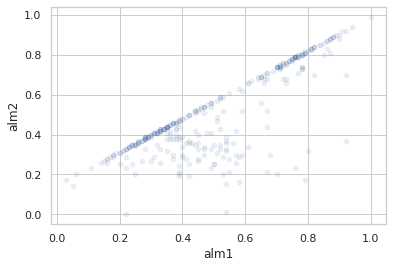

<Figure size 720x720 with 0 Axes>

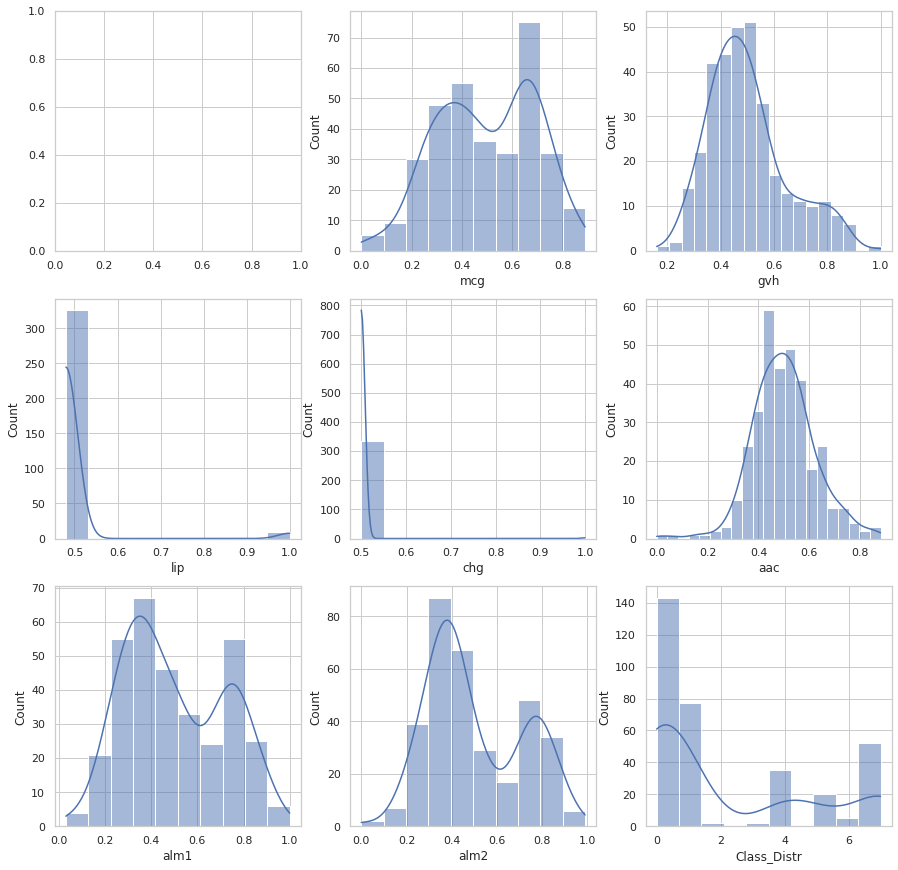

<Figure size 720x720 with 0 Axes>

In [ ]:
df.plot(kind="scatter", x="alm1", y="alm2",alpha=0.1)
plt.show()

sns.set(font_scale=1)
sns.set_style('whitegrid')


# scatter plots of each column (variable)
# define the number of subplots (number of rows x number of columns) 
n_rows=3
n_cols=3

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
for i, column in enumerate(df):
#   print(i,'---', column)
  if (i == 0):
    continue
  sns.histplot(data=df, x=column, kde=True, ax=axes[i // n_cols, i % n_cols])

plt.figure(figsize=(10, 10))

Ploting Heatmap of the data set

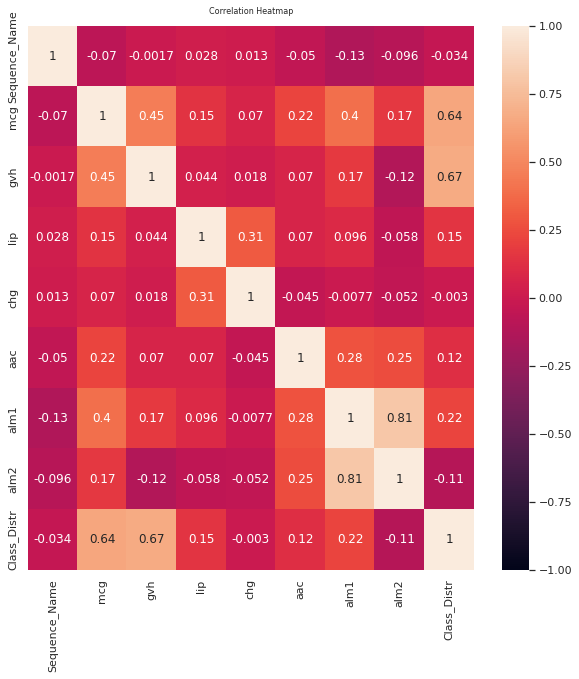

In [ ]:
plt.figure(figsize=(10, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)
plt.show()


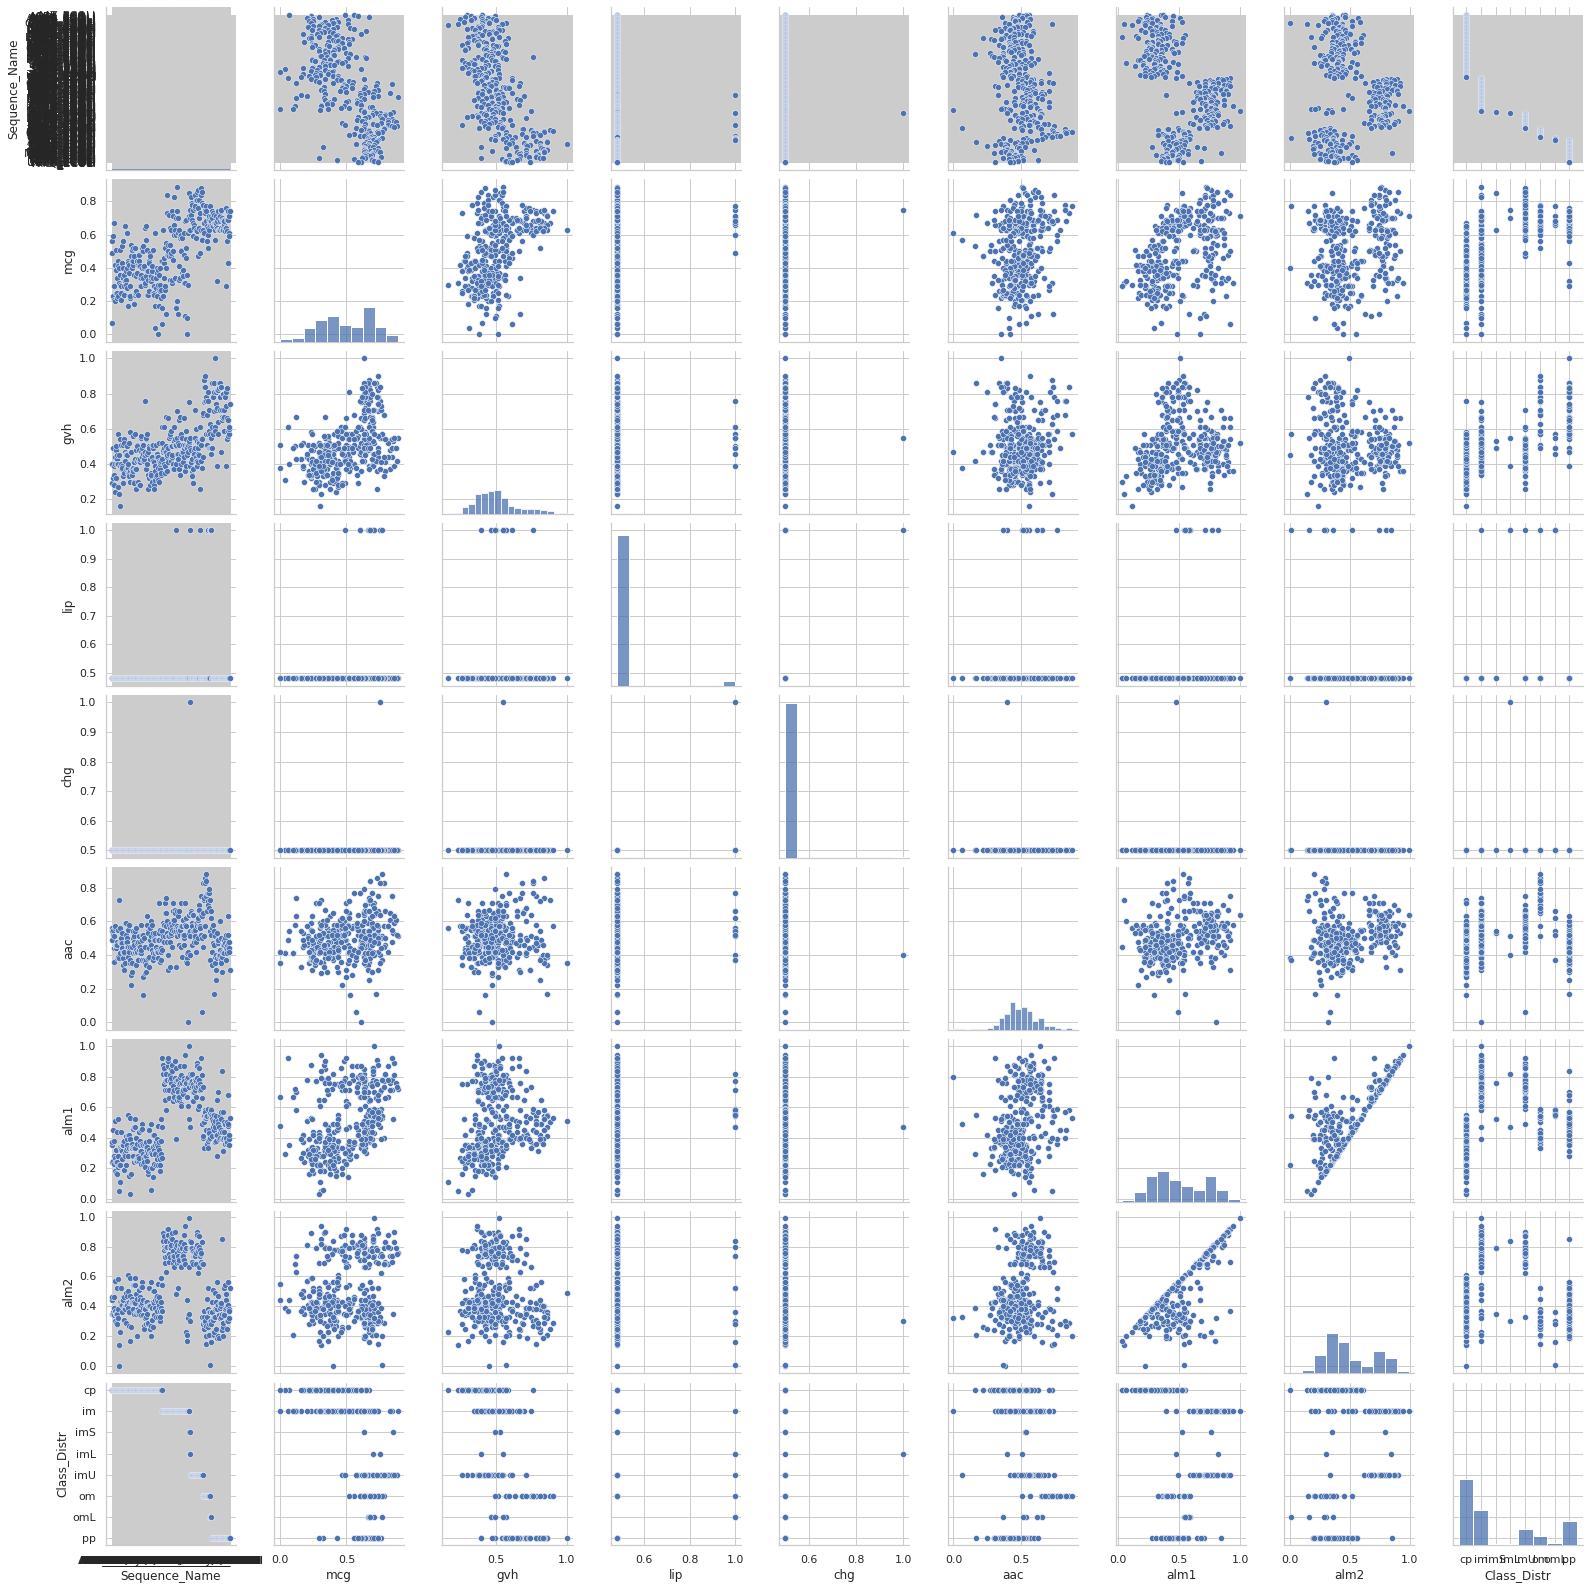

In [ ]:
# %% Make pairplots of the variables in the Dataframe
pp=sns.pairplot(data=df, vars=df.columns)

Making the train and test sets

In [145]:
inputs = df.drop('Class_Distr', axis="columns")
inputs = np.nan_to_num(inputs)

target = df['Class_Distr']
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = .2, random_state = 1)

DecisionTreeClassifier

In [173]:
clf_en = tree.DecisionTreeClassifier()
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
metrics.accuracy_score(y_test, y_pred_en)

0.8676470588235294

Model accuracy score with criterion entropy: 0.8676
Confusion matrix

 [[30  0  0  0  2]
 [ 0 12  2  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  2  0]
 [ 1  0  0  3 10]]


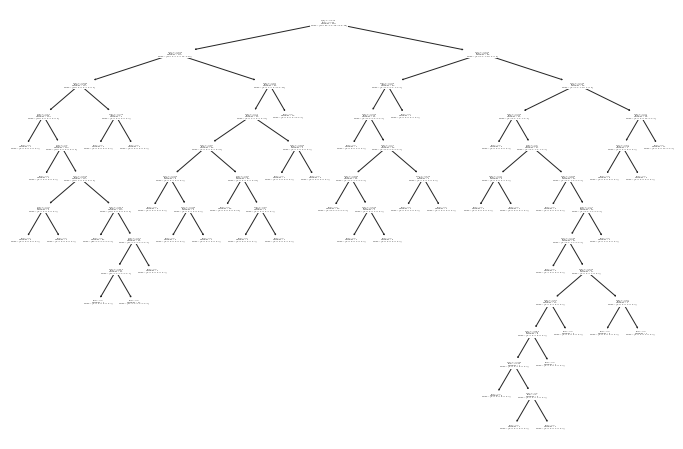

In [174]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
# y_pred_train_en
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

RandomForestClassifier

In [176]:
rdf = ensemble.RandomForestClassifier()
rdf.fit(X_train, y_train)
y_rdf_pred = rdf.predict(X_test)
metrics.accuracy_score(y_test, y_rdf_pred)

0.9117647058823529

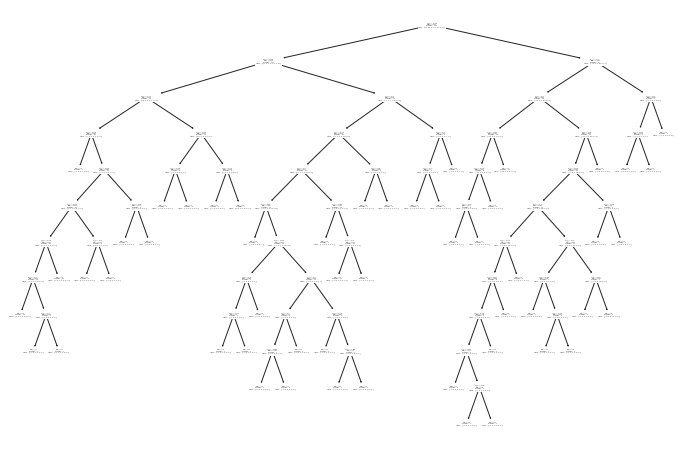

In [165]:
plt.figure(figsize=(12,8))
tree.plot_tree(rdf.estimators_[0])
cm = confusion_matrix(y_test, y_pred_en)

MLPClassifier

In [170]:
mlp = neural_network.MLPClassifier()
mlp.fit(X_train, y_train)
y_mlp_pred = mlp.predict(X_test)
metrics.accuracy_score(y_test, y_mlp_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6470588235294118

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


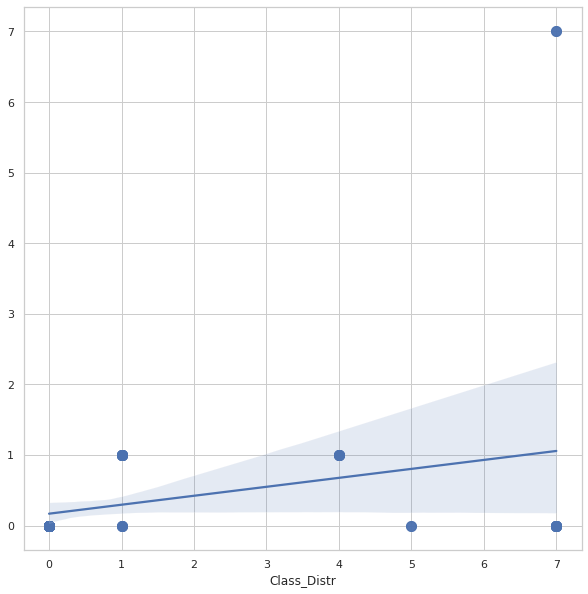

In [172]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, y_mlp_pred, fit_reg=True, scatter_kws={"s": 100})

GaussianNB

In [ ]:
nv = naive_bayes.GaussianNB()
nv.fit(X_train, y_train)
y_nv_pred = nv.predict(X_test)
metrics.accuracy_score(y_test, y_nv_pred)

0.8970588235294118

KNeighborsClassifier

In [ ]:
kn = neighbors.KNeighborsClassifier()
kn.fit(X_train, y_train)
y_kn_pred = kn.predict(X_test)
metrics.accuracy_score(y_test, y_kn_pred)

0.4264705882352941

SVC

In [141]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_svm_pred)

0.47058823529411764

 Απο τα παραπάνω παρατηρούμε οτι ο καλύτερος Classifier ειναι o RandomForestClassifier, γιατι ειναι οι ποιο κοντινες στο 1. Λογικο διοτι χρεισημοπιοι πολλα Decision Trees για να βγαλει το αποτελεσμα